## Refreshing the data
This relies on the `scraper.py` script being present and importable.

In [1]:
from scraper import scrape_to_csv

scrape_to_csv()

## Viewing the Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [3]:
tt_data = pd.read_csv('/data/time_tracking.csv', parse_dates=[0], index_col=[0])
# sort everything by date
tt_data = tt_data.sort_index(0)

## Selecting by Dates
The `tt_data` object is like a database table indexed by dates. Here are some examples of how to use that. Feel free to take a closer look at these slices of the data and play around with them or with new slices you create yourself.

In [4]:
# Selecting just one month
july = tt_data['7/2017']
# Selecting a range of months
may_to_july = tt_data['5/2017':'7/2017']

## Selecting By Project
You can also select items by project ID (first part of the Jira key).

In [5]:
itg = tt_data[tt_data['Project'] == "ITG"]

itg

,JIRA-Key,Project,Package Number,Name,Type,Complexity,Technology,Status,Packager,QA,Account/ Order#,Total Time (1),Time in period (2),QA passes,Overdue,Innovations (hr),Packaging & Development,Testing (hr),TR package (hr)
Date,,,,,,,,,,,,,,,,,,,
2012-01-01,ITG-1380,ITG,1380,VIAAgentursystem_12-10.001,AppChange,Medium,MSI,Approved,a.cheshkov,v.lavrynenko,NaN,6.0,6.0,1.0,NaN,NaN,4.0,2.0,NaN
2012-01-01,ITG-1379,ITG,1379,PC-Text-Server_12-10.001,AppChange,Easy,MSI,Approved,d.kovalenko,v.lavrynenko,NaN,5.0,5.0,1.0,NaN,NaN,3.0,2.0,NaN
2012-01-01,ITG-1378,ITG,1378,PC-Text_12-10.001,AppChange,Medium,MSI,Approved,d.kovalenko,v.lavrynenko,NaN,7.5,7.5,1.0,NaN,NaN,6.0,1.5,NaN
2012-01-01,ITG-1377,ITG,1377,PartnerDialog_12-10.001,AppChange,Medium,MSI,Approved,m.kalachov,v.lavrynenko,NaN,9.0,9.0,1.0,NaN,NaN,8.0,1.0,NaN
2012-01-01,ITG-1375,ITG,1375,Office2003-Konfiguration_12-10.001,AppChange,Medium,Legacy setup,Approved,d.kovalenko,v.lavrynenko,NaN,8.5,8.5,1.0,NaN,NaN,7.0,1.5,NaN
2012-01-01,ITG-1372,ITG,1372,MSPatches-Client_12-10.001,AppChange,Complex,Legacy setup,Approved,s.nazarovskiy,v.lavrynenko,NaN,12.0,12.0,1.0,NaN,NaN,8.5,3.5,NaN
2012-01-01,ITG-1371,ITG,1371,Office2003Patch_12-10.001,AppChange,Easy,Legacy setup,Approved,s.nazarovskiy,v.lavrynenko,NaN,4.5,4.5,1.0,NaN,NaN,2.5,2.0,NaN
2012-01-01,ITG-1370,ITG,1370,AcrobatReader_10-1-2.001,AppChange,Medium,MSI,Approved,m.kalachov,v.lavrynenko,NaN,9.0,9.0,1.0,NaN,NaN,6.0,3.0,NaN
2012-01-01,ITG-1369,ITG,1369,JavaSE_1-6-0-30.001,AppChange,Medium,MSI,Approved,s.nazarovskiy,v.lavrynenko,NaN,8.5,8.5,1.0,NaN,NaN,5.5,3.0,NaN


## Packaging Times

In [6]:
# To make life easier later, store column name for total packaging time as a constant
TOTAL_TIME = 'Total Time (1)'

by_complexity = tt_data.groupby('Complexity')[TOTAL_TIME]
by_complexity.describe()

,count,mean,std,min,25%,50%,75%,max
Complexity,,,,,,,,
Basic,6477.0,2.517693,1.875729,0.3,2.0,2.0,3.0,21.0
Complex,18939.0,17.262997,6.758269,0.3,14.9,19.0,20.3,67.0
Easy,35058.0,5.285367,1.957624,0.1,4.5,5.0,6.5,45.0
Medium,39933.0,9.698993,3.688607,0.2,8.0,10.0,12.0,70.0
NotSpecified,10617.0,2.967025,12.453282,0.1,1.0,1.5,3.0,327.5
Special,330.0,47.984545,45.037650,1.0,18.0,31.0,51.0,172.0


### Packaging time graphs

- The red lines are the packaging times of individual packages over time.
- The blue lines are the planned packaging times for packages of a certain category.
- The green lines are the averages of the actual packaging times by category.

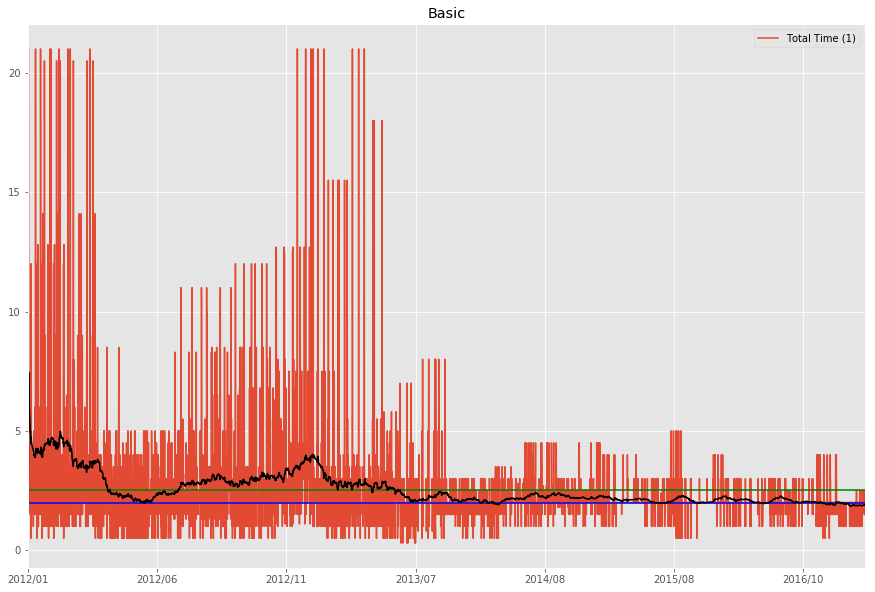

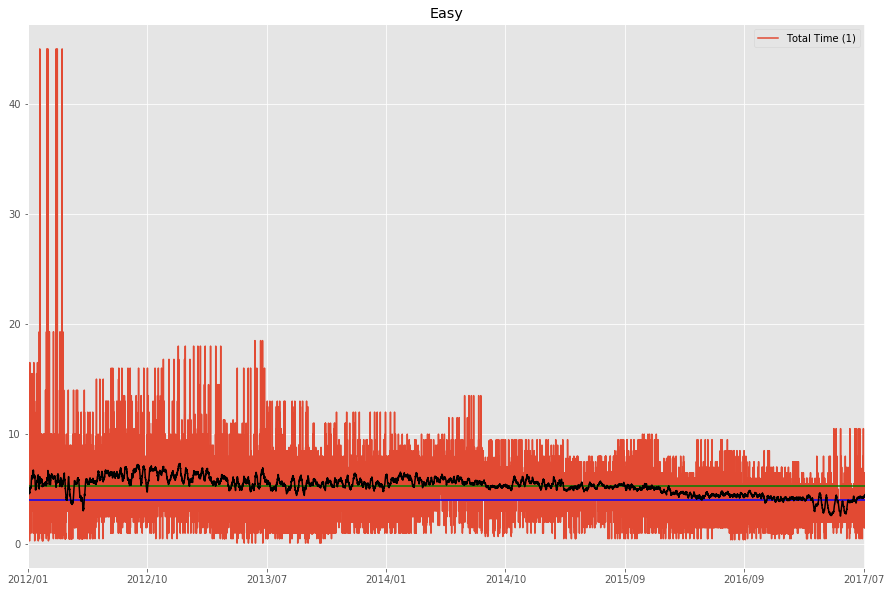

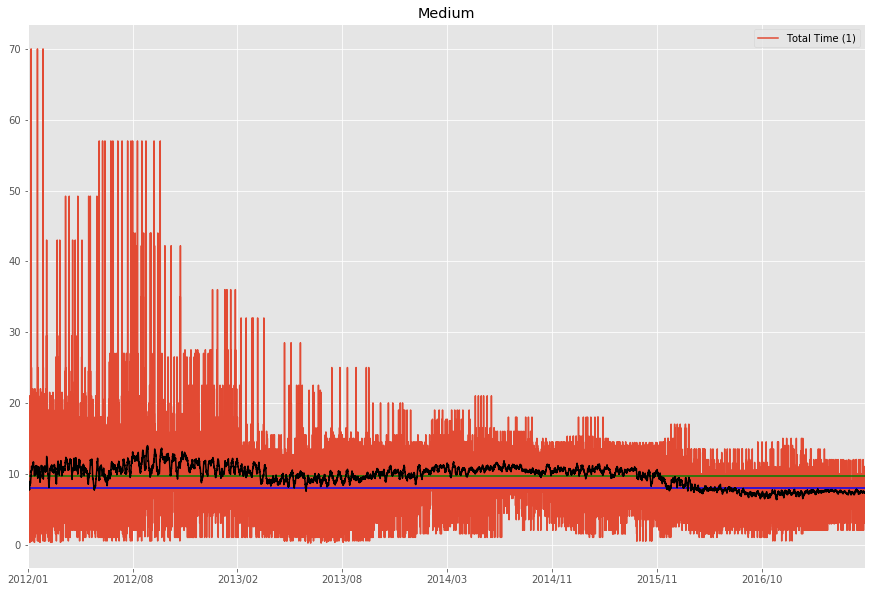

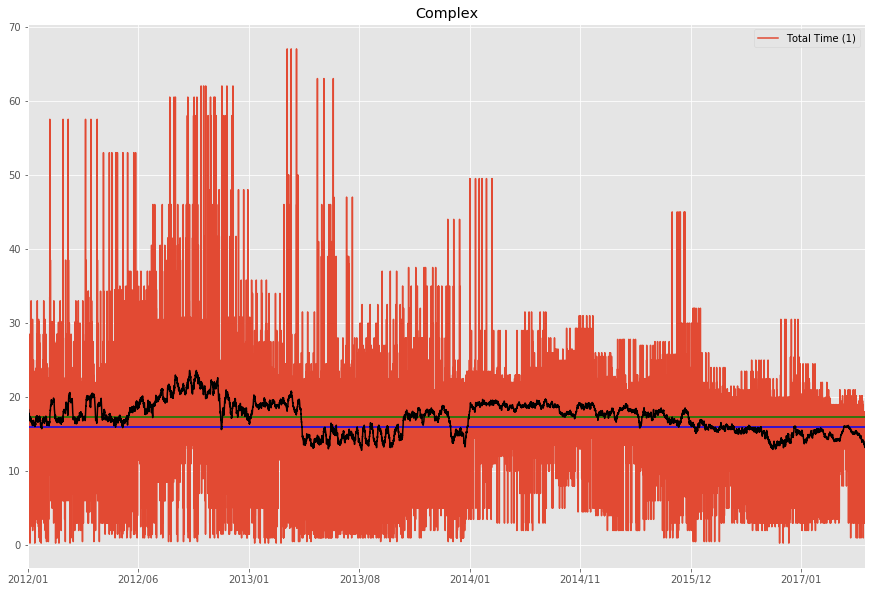

In [7]:
planned_times = {
    "Basic": 2,
    "Easy": 4,
    "Medium": 8,
    "Complex": 16
}

for complexity_type in ['Basic', 'Easy', 'Medium', 'Complex']:
    this_complexity = tt_data[tt_data['Complexity'] == complexity_type]
    index = np.arange(this_complexity[TOTAL_TIME].count())
    ax = this_complexity.plot(
        x=index,
        y=TOTAL_TIME,
        title=complexity_type,
        # This controls the size of the figure
        figsize=(15, 10),
    )
    ax.set_xticklabels(this_complexity.index[ax.get_xticks()[:-1].astype('int')].strftime("%Y/%m"))
    
    # Data Mean
    plt.axhline(y=this_complexity[TOTAL_TIME].mean(), color='green')
    
    # Planned packaging times
#     if complexity_type is not "NotSpecified":
    plt.axhline(y=planned_times[complexity_type], color='blue')
    
    # Running Average
    new = pd.DataFrame(data={TOTAL_TIME: this_complexity[TOTAL_TIME].values})
    plt.plot(new.rolling(100, min_periods=1).mean(), color='black')
    plt.show()

## Selecting outliers

In [8]:
def select_outliers(df, complexity_type, value):
    this_complexity = df[df['Complexity'] == complexity_type]
    cutoff = this_complexity[TOTAL_TIME].std() + value
    return this_complexity[this_complexity[TOTAL_TIME] > cutoff]
    

In [9]:
len(select_outliers(tt_data, 'Easy', planned_times['Easy']))

11139

### WIP: Nicer Date indices

It might be potentially useful to have the x-axis labels be evenly spaced in terms of dates, not in terms of packages, as they are right now.
This is definitely quite a bit more advanced, so will require a bit of time before it's implemented.

In [10]:
index[this_complexity.index.get_loc('2017/01')][0]

17463